# Instability of the Matching Kernel of ZOGY Algorithm

Shu Liu

This notebook is inspired by the work from  [dmtn-179](https://dmtn-179.lsst.io)

## 1. Convention

`Continuous Fourier Transform (CFT)`:

$F(\omega) = \int_{-\infty}^{\infty} f(x) e^{-i\omega x} dx$

$f(x) = \frac{1}{2\pi} \int_{-\infty}^{\infty} F(\omega) e^{i\omega x} d\omega$

Example: [CFT of Gaussian](http://www.cse.yorku.ca/~kosta/CompVis_Notes/fourier_transform_Gaussian.pdf)

$g(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{\frac{-x^2}{2\sigma^2}}, \quad G(\omega) = e^{-\frac{\omega^2\sigma^2}{2}}$

`Discrete Time Fourier Transform (DTFT)` [link](https://en.wikipedia.org/wiki/Discrete-time_Fourier_transform#cite_note-5)

`Discrete Fourier Transform (DFT)`

[numpy convention](https://numpy.org/doc/stable/reference/routines.fft.html):

$X[k] = \Sigma_{m=0}^{N-1} x[n] e^{-2\pi i \frac{mk}{N}}, \quad\quad m = 0, ..., N-1.$

$x[n] = \frac{1}{N}\Sigma_{k=0}^{N-1} X[k] e^{2\pi i \frac{mk}{N}}, \quad\quad k = 0, ..., N-1.$

## 2. ZOGY Algorithm

$R = T_r \otimes P_r + \epsilon_r$      
$ N = T_n \otimes P_n + \epsilon_n$

$\hat{D} = \frac{\hat{P_r}\hat{N} - \hat{P_n}\hat{R}}{\sqrt{\sigma_n^2 |\hat{P_r}|^2 + \sigma_r^2 |\hat{P_n}|^2}}$, $\hat{P_D} = \frac{\hat{P_r}\hat{P_n}}{\sqrt{\sigma_n^2 |\hat{P_r}|^2 + \sigma_r^2 |\hat{P_n}|^2}}$,
$\hat{S} = \hat{D}\bar{\hat{P_D}} = \frac{\bar{\hat{P_n}}|\hat{P_r}|^2\hat{N} - \bar{\hat{P_r}}|\hat{P_n}|^2\hat{R}} {\sigma_n^2 |\hat{P_r}|^2 + \sigma_r^2 |\hat{P_n}|^2}$

Let us check that $\hat{P_D}$ is a proper PSF.

Ignore noise term, we have:

$\hat{D} = \frac{\hat{P_r}\hat{N} - \hat{P_n}\hat{R}}{\sqrt{\sigma_n^2 |\hat{P_r}|^2 + \sigma_r^2 |\hat{P_n}|^2}}  
\approx \frac{\hat{P_r}\hat{P_n}\hat{T_n} - \hat{P_n}\hat{P_r}\hat{T_r}}{\sqrt{\sigma_n^2 |\hat{P_r}|^2 + \sigma_r^2 |\hat{P_n}|^2}} 
= \frac{\hat{P_r}\hat{P_n} }{\sqrt{\sigma_n^2 |\hat{P_r}|^2 + \sigma_r^2 |\hat{P_n}|^2}}(\hat{T_n} - \hat{T_r}) \\
=\hat{P_D}(\hat{T_n} - \hat{T_r})$

$\hat{P_D}$ is the proper PSF of the difference image.

Define matching kernels $c_n$, $c_r$ as:

$\hat{c_n} = \frac{\hat{P_r}}{\sqrt{\sigma_n^2 |\hat{P_r}|^2 + \sigma_r^2 |\hat{P_n}|^2}}, \quad  \hat{c_r} = \frac{\hat{P_n}}{\sqrt{\sigma_n^2 |\hat{P_r}|^2 + \sigma_r^2 |\hat{P_n}|^2}}$

In image space, we have:

$D = c_n \otimes N - c_r \otimes R$

[dmtn-179](https://dmtn-179.lsst.io) examines $c_n$ and $c_r$ because the irrregularity in the matching kernels could result in artifacts directly in N or R.

We repeat some similar work in the next section.

For simplicity, we assume the PSFs be Gaussian. So its Fourier transform is also real and symmetric. Also, we use 1 and 2 to distinguish PSFs because $c_n$ and $c_r$ are symetric in $n$ and $r$. So in Fourier space, we have:

$\hat{c_1} = \frac{|\hat{P_2}|}{\sqrt{\sigma_1^2 |\hat{P_2}|^2 + \sigma_2^2 |\hat{P_1}|^2}} \\
=\frac{1}{\sigma_1} \frac{1}{\sqrt{1 + \frac{\sigma_2^2}{\sigma_1^2} \frac{|\hat{P_1}|^2}{|\hat{P_2}|^2}}}$

The factor $\frac{1}{\sigma_1}$ plays the roal of normalization of the standard deviation of image 1.

At high frequency, both $\hat{P_1}$ and $\hat{P_2}$ approach to zero. The ratio will determine the limit value of $\hat{c}$.

For two Gaussian PSFs $G_\alpha$ and $G_\beta$. Their ratio takes the form: 

$\frac{G_\alpha}{G_\beta} = \frac{\sigma_\beta}{\sigma_\alpha} e^{ \frac{-\omega^2}{2} (\frac{1}{\sigma_\alpha^2} - \frac{1}{\sigma_\beta^2})}$

When $x$ approaches to infinity, if $\sigma_\alpha < \sigma_\beta$, the ratio will approach to 0. If $\sigma_\alpha > \sigma_\beta$, the ratio will approach to infinity. 

To summarize, :
    
Limit Value of $\hat{P_1} / \hat{P_2}$ | Limit Value of $\hat{c}$ |

$P_1$ narrower than $P_2 \Rightarrow \hat{P_1}$ broader than $\hat{P_2} \Rightarrow \hat{P_1} / \hat{P_2} \sim \infty \Rightarrow \hat{c_1} \sim 0$   
 
 $P_1$ broader than $P_2 \Rightarrow \hat{P_1}$ narrower than $\hat{P_2} \Rightarrow \hat{P_1} / \hat{P_2} \sim 0 \Rightarrow \hat{c_1} \sim \frac{1}{\sigma_1}$ 

So we find that if image 1 has the narrower PSF, the matching kernel act on it will approach 0 at high frequency, which decrease the detail of image1. If image 2 has the broader PSF, the matching kernel act on it will approach a constant at high frequency, which preserve the shape of the detail.

Now we test these this using 1-D PSFs.

## 4. Instability of FFT

### a. Sample PSF in Fourier space

In [11]:
from numpy import fft
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [12]:
def compute_w(N, dt):
    # N:        number of data
    # dt:       sampling rate
    # Returns:
    # w:        CTFT frequency
    f = 1 / dt
    dw = 2 * np.pi * f / N
    min_w = - np.pi * f
    max_w = np.pi * f
    return np.arange(min_w, max_w, dw)

def inverse_gaussian(sig, w):
    # The CTFT of a normalized Gaussian with sigma=sig
    return np.exp(-w**2 * sig**2 / 2)

def compute_c(f_psf_1, f_psf_2, sig1, sig2):
    c = f_psf_2 / np.sqrt(sig1**2 * np.abs(f_psf_2)**2 + sig2**2 * np.abs(f_psf_1)**2)
    return c

In [21]:
# In image space
sig1 = 2.2
sig2 = 3.3

L = 10
dt = 0.1
x = np.arange(- L  / 2, L / 2, dt) * dt
N = len(x)

w = compute_w(N, dt)

f_psf_1_theory = inverse_gaussian(sig1, w) 
f_psf_2_theory = inverse_gaussian(sig2, w) 

c1_theory =  compute_c(f_psf_1_theory, f_psf_2_theory, sig1, sig2)
c2_theory = compute_c(f_psf_2_theory, f_psf_1_theory, sig2, sig1)

/opt/lsst/software/stack/python/miniconda3-4.7.10/envs/lsst-scipipe-4d7b902/lib/python3.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in true_divide
/opt/lsst/software/stack/python/miniconda3-4.7.10/envs/lsst-scipipe-4d7b902/lib/python3.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: divide by zero encountered in true_divide


In [22]:
ccyy_1 = fft.fftshift(f_psf_1_theory)
ccyy_2 = fft.fftshift(f_psf_2_theory)


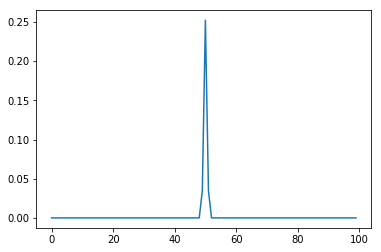

In [54]:
plt.plot(psf)

In [55]:
psf.shape

(100,)

In [56]:
psf = f_psf_1_theory   * f_psf_2_theory   / np.sqrt(sig1**2 * np.abs(f_psf_2_theory  )**2 + sig2**2 * np.abs(f_psf_1_theory)**2)

/opt/lsst/software/stack/python/miniconda3-4.7.10/envs/lsst-scipipe-4d7b902/lib/python3.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


In [57]:
psf[np.isnan(psf)] = 0

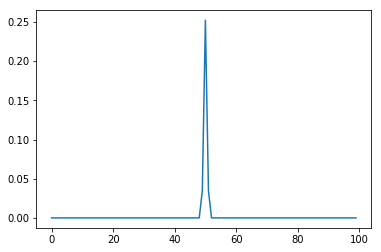

In [58]:
plt.plot(psf)

In [59]:
ccyy = fft.fftshift(fft.ifft(fft.fftshift(psf)))

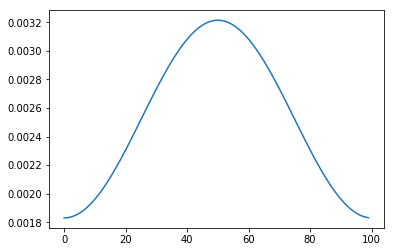

In [60]:
plt.plot(ccyy.real)

In [46]:
psf[50-19:50+20]

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       2.69545893e-211, 3.19046376e-184, 5.12809683e-159, 1.11928304e-135,
       3.31745415e-114, 1.33521512e-094, 7.29757987e-077, 5.41611374e-061,
       5.45855888e-047, 7.47049751e-035, 1.38836084e-024, 3.50377726e-016,
       1.20074815e-009, 5.58781246e-005, 3.46135094e-002, 2.52136453e-001,
       3.46135094e-002, 5.58781246e-005, 1.20074815e-009, 3.50377726e-016,
       1.38836084e-024, 7.47049751e-035, 5.45855888e-047, 5.41611374e-061,
       7.29757987e-077, 1.33521512e-094, 3.31745415e-114, 1.11928304e-135,
       5.12809683e-159, 3.19046376e-184, 2.69545893e-211, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000])

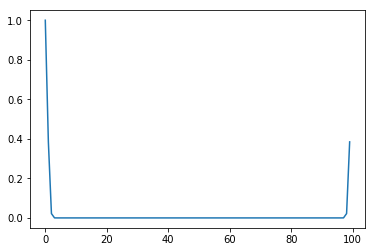

In [27]:
plt.plot(ccyy_1)

In [7]:
fft.fftshift(fft.ifft2( / ).real)

/opt/lsst/software/stack/python/miniconda3-4.7.10/envs/lsst-scipipe-4d7b902/lib/python3.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/opt/lsst/software/stack/python/miniconda3-4.7.10/envs/lsst-scipipe-4d7b902/lib/python3.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


IndexError: index -2 is out of bounds for size 1

/opt/lsst/software/stack/python/miniconda3-4.7.10/envs/lsst-scipipe-4d7b902/lib/python3.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/opt/lsst/software/stack/python/miniconda3-4.7.10/envs/lsst-scipipe-4d7b902/lib/python3.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


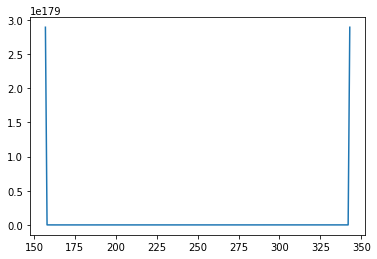

In [6]:
plt.plot(f_psf_1_theory/f_psf_2_theory)

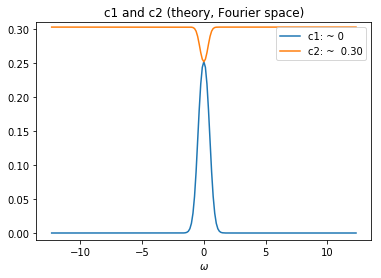

In [446]:
plt.plot(w, c1_theory, label='c1: ~ 0')
plt.plot(w, c2_theory, label=f'c2: ~ {1/sig2: .2f}')
plt.ylim(-0.01,0.31)
plt.xlabel('$\omega$')
plt.title('c1 and c2 (theory, Fourier space)')
plt.legend()

This is as we expected. We should note that $c_1$ and $c_2$ has nan values at high frequency, this is caused by the division of zero. We should note that this numerical issue is more serious when we are doing FFT.

In [369]:
print(c1_theory[0:10])

[nan nan nan nan nan nan nan nan nan nan]


### b. Sample PSF in image space, then use FFT.

In [538]:
def compare_c1_c2(sig1, sig2, L, dt, delta=None):
    # L:     cutoff length of the signal
    # dt:    sampling rate
    x = np.arange(- L  / 2, L / 2, dt) * dt
    N = len(x)
    psf_1 = fft.fftshift(norm.pdf(x, loc=0, scale=sig1))
    psf_2 = fft.fftshift(norm.pdf(x, loc=0, scale=sig2))
    
    f_psf_1 =  fft.fftshift(fft.fft(psf_1).real)
    f_psf_2 =  fft.fftshift(fft.fft(psf_2).real)
    
    w = compute_w(N, dt)
    c1 =  compute_c(f_psf_1, f_psf_2, sig1, sig2)
    c2 = compute_c(f_psf_2, f_psf_1, sig2, sig1)
    if not delta:
        left = int(N/2 - 30)
        right = int(N/2 + 30)
    else:
        left = int(N/2 - delta)
        right = int(N/2 + delta)
        
    fig, ax = plt.subplots(1,3, figsize=(15,5))
    ax[0].set_title(f'N = {N}')
    ax[0].plot(w[left: right], c1[left: right], label='c1')
    ax[0].plot(w[left: right], c2[left: right], label='c2')
    ax[0].set_xlabel('$\omega$')
    ax[0].legend()
    
    ax[1].plot(w[left: right], f_psf_1[left: right], label='psf_1')
    ax[1].set_title('psf 1, Fourier space, 1e-14')
    ax[1].set_xlabel('$\omega$')
    ax[1].set_ylim(-1e-14,1e-14)
    
    ax[2].plot(w[left: right], f_psf_2[left: right], label='psf_2')
    ax[2].set_title('psf 2, Fourier space, 1e-11')
    ax[2].set_xlabel('$\omega$')
    ax[2].set_ylim(-1e-11,1e-11)
    

/opt/lsst/software/stack/python/miniconda3-4.7.10/envs/lsst-scipipe-4d7b902/lib/python3.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in true_divide


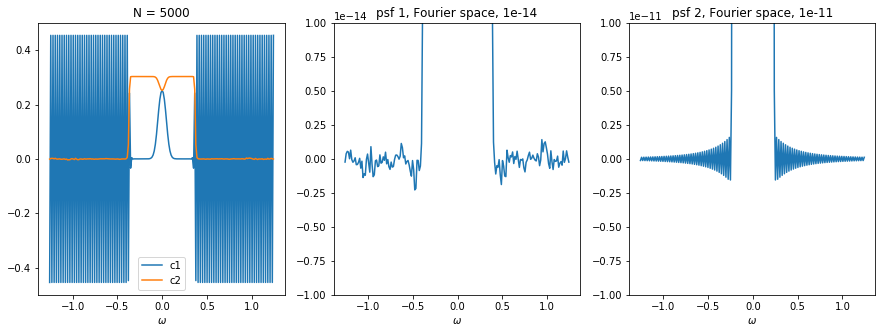

In [539]:
compare_c1_c2(sig1, sig2, dt=dt, L=500, delta=100)

In the first figure, we find that the matching kernels deviate from the theoretical limit at $\omega = +/- 0.5$. In figure 2 and 3, we find that the Fourier transform of PSFs begin to fluctuate around zero at $\omega = +/- 0.5$. So numerical precision of the FFT cause the irregularity of the matching kernels.

1. preConv - best preConv kernel

2. matching kernel at high frequency

3. dm get convinced, flux measurement, smp, scene-modeling-photometry (DES), slow, dia is not the optimal way for photometry

## 5. DC2 PSF

In this section, we check the matching kernels using PSFs from DC2 images.

In [3]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from lsst.daf.persistence import Butler

In [1]:
tract = 4639
visit = 1231329
filt = 'i'
detector = 179
patch = '0,0'

In [ ]:
imageDifferenceDriver.py  /global/cfs/projectdirs/lsst/production/DC2_ImSim/Run2.2i/desc_dm_drp/v19.0.0-v1/rerun/run2.2i-coadd-wfd-dr6-v1-grizy \
    --output ./test_zogy \
    --id visit=1231329 detector=179  -C diffimConfig_zogy.py \
    --clobber-config --clobber-versions --cores 4

In [4]:
coadd_id = {'tract': tract, 'patch': patch, 'filter': filt}
calexp_id = {'visit': visit, 'detector': detector, 'filter': filt}

coadd_repo = '/global/cfs/projectdirs/lsst/production/DC2_ImSim/Run2.2i/desc_dm_drp/v19.0.0-v1/rerun/run2.2i-coadd-wfd-dr6-v1-grizy'
calexp_repo = '/global/cfs/projectdirs/lsst/production/DC2_ImSim/Run2.2i/desc_dm_drp/v19.0.0-v1/rerun/run2.2i-calexp-v1'

coadd_butler = Butler(coadd_repo)
calexp_butler = Butler(calexp_repo)

coadd_exp = coadd_butler.get('deepCoadd', coadd_id)
calexp_exp = coadd_butler.get('calexp', calexp_id)

In [664]:
diff_id = {'visit': visit, 'detector': detector, 'filter': filt}
diff_repo = './test_zogy/'
diff_butler = Butler(diff_repo)
diff_exp = diff_butler.get('deepDiff_differenceExp', diff_id)

In [665]:
diff_psf = diff_exp.getPsf().computeImage().array
# save_fits(diff_psf, 'PSF_diff.fits')

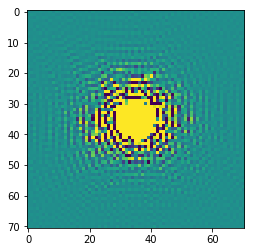

In [666]:
plt.imshow(interval(diff_psf))

In [732]:
from scipy.stats import multivariate_normal

In [6]:
coadd_psf = coadd_exp.getPsf()
calexp_psf = calexp_exp.getPsf()

In [9]:
ccyy = coadd_psf.computeImage().array

In [10]:
ccyy.shape

(59, 59)

In [ ]:
0-58

In [ ]:
30th idx 29

In [26]:
def half_max_radius(psf):
    shape_1, shape_2 = psf.shape
    max_val = psf[shape_1//2][shape_2//2]
    radii = []
    for i in range(shape_2):
        if psf[shape_1//2][i] / max_val > 0.3:
            radii.append(shape_1 // 2 - i)
            break
    for i in range(shape_2 - 1, -1, -1):
        if psf[shape_1//2][i] / max_val > 0.3:
            radii.append(i - shape_1 // 2)
            break
    for i in range(shape_1):
        if psf[i][shape_2//2] / max_val > 0.3:
            radii.append(shape_2 // 2 - i)
            break
    for i in range(shape_1 - 1, -1, -1):
        if psf[i][shape_2//2] / max_val > 0.3:
            radii.append(i - shape_2 // 2)
            break
    print(radii)
    return np.array(radii).mean()

In [27]:
half_max_radius(coadd_psf.computeImage().array)

[2, 2, 2, 2]


2.0

In [28]:
half_max_radius(calexp_psf.computeImage().array)

[1, 2, 2, 1]


1.5

In [696]:
coadd_psf = coadd_exp.getPsf().computeImage().array
calexp_psf = calexp_exp.getPsf().computeImage().array
print(coadd_psf.shape, calexp_psf.shape)
coadd_psf = np.pad(coadd_psf, (1, 0), 'constant', constant_values=0)
calexp_psf = np.pad(calexp_psf, (10, 9), 'constant', constant_values=0)
print(coadd_psf.shape, calexp_psf.shape)

coadd_psf = fft.fftshift(coadd_psf)
calexp_psf = fft.fftshift(calexp_psf)
print(np.unravel_index(
    np.argmax(coadd_psf, axis=None), coadd_psf.shape), np.unravel_index(np.argmax(calexp_psf, axis=None), calexp_psf.shape)
     )

coadd_max = coadd_psf[0][0]
calexp_max = calexp_psf[0][0]

coadd_3s = coadd_psf[0][0] * np.exp(-4.5)
calexp_3s = calexp_psf[0][0] * np.exp(-4.5)

print(f'coadd 3-sigma value: {coadd_3s: .5f}, calexp 3-sigma value: {calexp_3s: .5f}')

(59, 59) (41, 41)
(60, 60) (60, 60)
(0, 0) (0, 0)
coadd 3-sigma value:  0.00054, calexp 3-sigma value:  0.00095


In [697]:
# s ave_fits(fft.fftshift(calexp_psf), 'psf_calexp.fits')

In [728]:
f_coadd = fft.fft2(coadd_psf)

f_calexp = fft.fft2(calexp_psf)
w = np.arange(- np.pi, np.pi, 2 * np.pi / 60)

In [729]:

def compute_pd(f_psf_1, f_psf_2, sig1, sig2):
    pd = f_psf_1 * f_psf_2 / np.sqrt(0.8*sig1**2 * np.abs(f_psf_2)**2 + 0.00008*sig2**2 * np.abs(f_psf_1)**2)
    return pd

In [730]:
pd = compute_pd(f_coadd, f_calexp, 2, 5)
pd = fft.fftshift(
    fft.ifft2(pd)
)

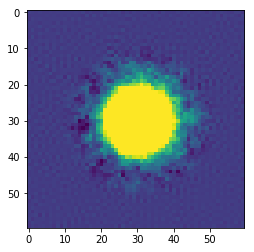

In [731]:
plt.imshow(interval(pd.real))

In [725]:
# save_fits(pd.real, 'pd.fits')

In [706]:
ps = (pd.conj() * pd).real

In [708]:
save_fits(ps,'ps.fits')

In [622]:
f_coadd.real[0:10][0:50].shape

(10, 60)

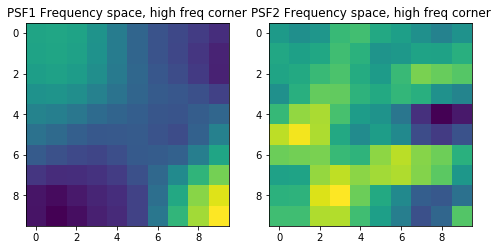

In [623]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(fft.fftshift(f_coadd).real[0:10, 0:10])
ax[0].set_title('PSF1 Frequency space, high freq corner')
ax[1].imshow(fft.fftshift(f_calexp).real[0:10, 0:10])
ax[1].set_title('PSF2 Frequency space, high freq corner')


print()

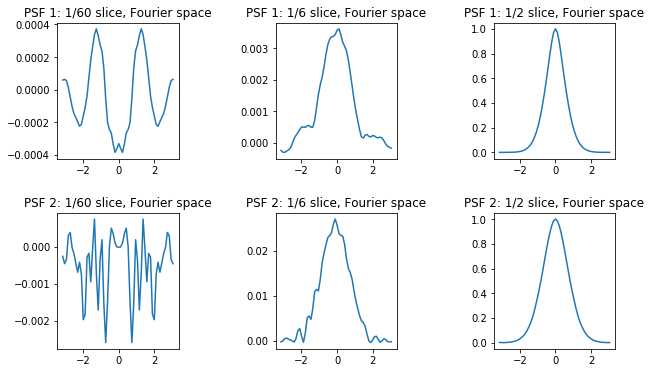

In [624]:
fig, ax = plt.subplots(2, 3, figsize=(10, 6))
fig.subplots_adjust(wspace=0.8, hspace=0.4)
ax[0][0].plot(w, fft.fftshift(f_coadd).real[0])
ax[0][0].set_title('PSF 1: 1/60 slice, Fourier space')
ax[0][1].plot(w, fft.fftshift(f_coadd).real[10])
ax[0][1].set_title('PSF 1: 1/6 slice, Fourier space')
ax[0][2].plot(w, fft.fftshift(f_coadd).real[30])
ax[0][2].set_title('PSF 1: 1/2 slice, Fourier space')

ax[1][0].plot(w, fft.fftshift(f_calexp).real[0])
ax[1][0].set_title('PSF 2: 1/60 slice, Fourier space')
ax[1][1].plot(w, fft.fftshift(f_calexp).real[10])
ax[1][1].set_title('PSF 2: 1/6 slice, Fourier space')
ax[1][2].plot(w, fft.fftshift(f_calexp).real[30])
ax[1][2].set_title('PSF 2: 1/2 slice, Fourier space')

print()

In [625]:
c1 = compute_c(f_coadd, f_calexp, 1, 1)
c2 = compute_c(f_calexp, f_coadd, 1, 1)

m = np.mean(c1.real)
std = np.std(c1.real)

In [626]:
c1_shift = fft.fftshift(c1)
c2_shift = fft.fftshift(c2)

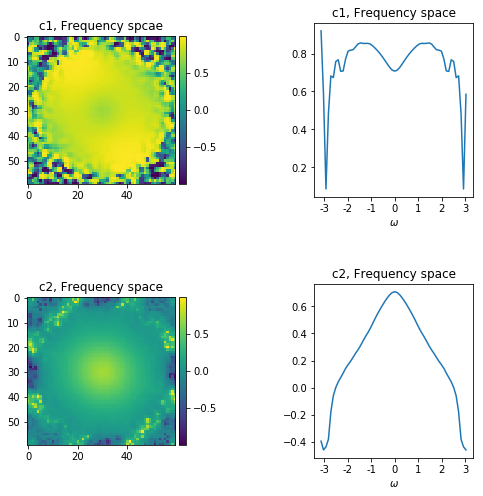

In [627]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
fig.subplots_adjust(wspace=0.8, hspace=0.5)
im0 = ax[0][0].imshow(c1_shift.real)
ax[0][0].set_title('c1, Frequency spcae')

ax[0][1].plot(w, c1_shift.real[30])
ax[0][1].set_xticks([ -3, -2, -1, 0, 1, 2, 3])
ax[0][1].set_xticklabels([-3, -2, -1, 0, 1, 2, 3])
ax[0][1].set_title('c1, Frequency space')
ax[0][1].set_xlabel('$\omega$')

divider = make_axes_locatable(ax[0][0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im0, cax=cax, orientation='vertical')

im1 = ax[1][0].imshow(c2_shift.real)
ax[1][0].set_title('c2, Frequency space')

divider = make_axes_locatable(ax[1][0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im0, cax=cax, orientation='vertical')

ax[1][1].plot(w, c2_shift.real[30])
ax[1][1].set_xticks([ -3, -2, -1, 0, 1, 2, 3])
ax[1][1].set_xticklabels([-3, -2, -1, 0, 1, 2, 3])
ax[1][1].set_title('c2, Frequency space')
ax[1][1].set_xlabel('$\omega$')
print()

In [643]:
!pwd

/global/cfs/cdirs/desc-sn/dia/data/shl159/fake_injection/more_visits


In [628]:
from astropy.visualization import ZScaleInterval

In [629]:
interval = ZScaleInterval()

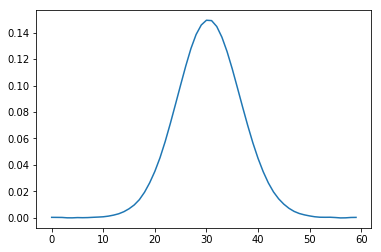

In [630]:
plt.plot((fft.fftshift(f_coadd.real) * c1_shift.real)[40])

In [642]:
save_fits(coadd_psf, 'coadd_psf.fits')

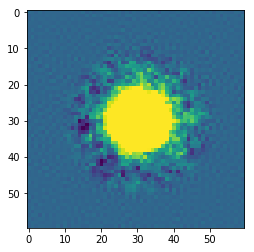

In [639]:
ccyy = fft.fftshift( fft.fftshift(f_coadd) * c1_shift )
ccyy = fft.ifft2(ccyy)
ccyy = fft.fftshift(ccyy).real
plt.imshow(interval(ccyy))
save_fits(ccyy, 'new3.fits')

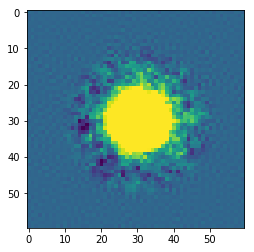

In [640]:
ycy = fft.fftshift(fft.ifft2(
    fft.fftshift(fft.fftshift(f_calexp) * c2_shift)
)).real
save_fits(ycy, 'new4.fits')
plt.imshow(interval(ycy))

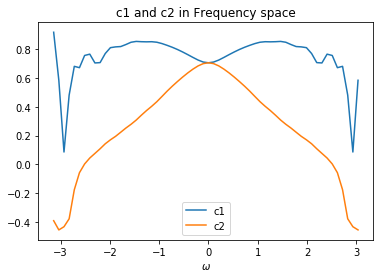

In [590]:
plt.plot(w, c1_shift.real[30], label='c1')
plt.plot(w, c2_shift.real[30], label='c2')
plt.xlabel('$\omega$')
plt.title('c1 and c2 in Frequency space')
plt.legend()


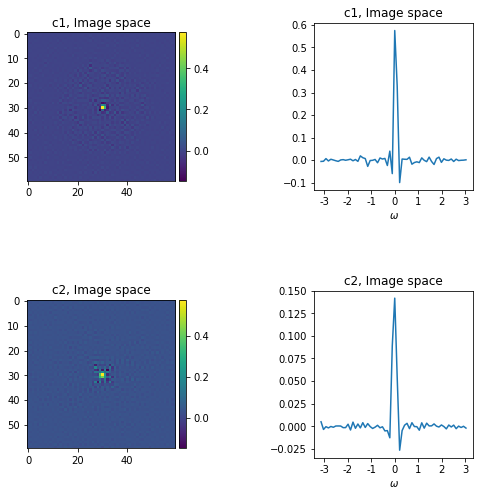

In [592]:
c1_xy = fft.ifft2(fft.fftshift(c1_shift))
c2_xy = fft.ifft2(fft.fftshift(c2_shift))

c1_xy = fft.fftshift(c1_xy)
c2_xy = fft.fftshift(c2_xy)

fig, ax = plt.subplots(2, 2, figsize=(8, 8))
fig.subplots_adjust(wspace=0.8, hspace=0.6)
im0 = ax[0][0].imshow(c1_xy.real)
ax[0][0].set_title('c1, Image space')

ax[0][1].plot(w, c1_xy.real[30])
ax[0][1].set_title('c1, Image space')
ax[0][1].set_xlabel('$\omega$')
ax[0][1].set_xticks([ -3, -2, -1, 0, 1, 2, 3])
ax[0][1].set_xticklabels([-3, -2, -1, 0, 1, 2, 3])

divider = make_axes_locatable(ax[0][0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im0, cax=cax, orientation='vertical')

im1 = ax[1][0].imshow(c2_xy.real)
ax[1][0].set_title('c2, Image space')

divider = make_axes_locatable(ax[1][0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im0, cax=cax, orientation='vertical')

ax[1][1].plot(w, c2_xy.real[30])
ax[1][1].set_title('c2, Image space')
ax[1][1].set_xlabel('$\omega$')

ax[1][1].set_xticks([ -3, -2, -1, 0, 1, 2, 3])
ax[1][1].set_xticklabels([-3, -2, -1, 0, 1, 2, 3])
print()

In [607]:
from scipy.signal import convolve as scipy_convolve
from scipy.ndimage import convolve

from astropy.io import fits

In [606]:
c1_coadd = convolve(coadd_exp.getImage().array, c1_xy.real, mode='constant', cval=0.0)
coadd_exp.getImage().array.shape

hdu = fits.PrimaryHDU(c1_coadd)
hdul = fits.HDUList([hdu])
hdul.writeto('new1.fits')

(4100, 4100)

In [534]:
c1 = compute_c(f_coadd, f_calexp, 1, 1)
c2 = compute_c(f_calexp, f_coadd, 1, 1)
c1_shift = fft.fftshift(c1)
c2_shift = fft.fftshift(c2)

for x in range(60):
    for y in range(60):
        if np.sqrt((x-30)**2 + (y-30)**2) > 15:
            c1_shift.real[x][y] = 0.85
            c1_shift.imag[x][y] = 0.85
        if np.sqrt((x-30)**2 + (y-30)**2) > 20:
            c2_shift.real[x][y] = 0
            c2_shift.imag[x][y] = 0

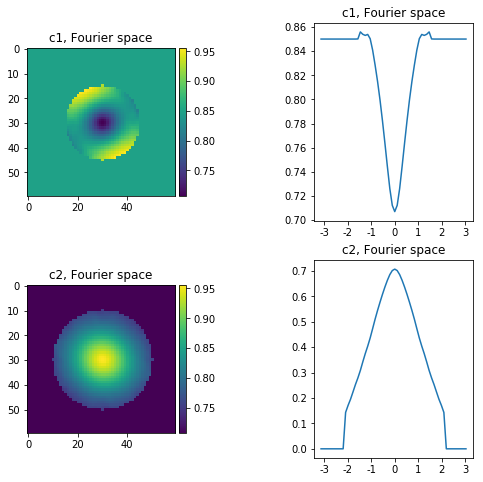

In [537]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
fig.subplots_adjust(wspace=0.8)
im0 = ax[0][0].imshow(c1_shift.real)
ax[0][0].set_title('c1, Fourier space')

ax[0][1].plot(w, c1_shift.real[30])
ax[0][1].set_xticks([ -3, -2, -1, 0, 1, 2, 3])
ax[0][1].set_xticklabels([-3, -2, -1, 0, 1, 2, 3])
ax[0][1].set_title('c1, Fourier space')


divider = make_axes_locatable(ax[0][0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im0, cax=cax, orientation='vertical')

im1 = ax[1][0].imshow(c2_shift.real)
ax[1][0].set_title('c2, Fourier space')

divider = make_axes_locatable(ax[1][0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im0, cax=cax, orientation='vertical')

ax[1][1].plot(w, c2_shift.real[30])
ax[1][1].set_title('c2, Fourier space')

ax[1][1].set_xticks([ -3, -2, -1, 0, 1, 2, 3])
ax[1][1].set_xticklabels([-3, -2, -1, 0, 1, 2, 3])
print()

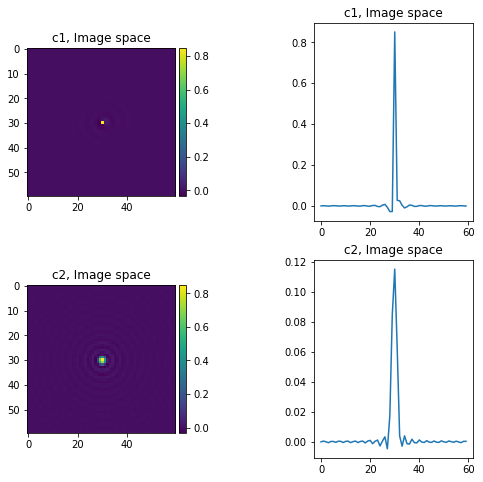

In [536]:
c1_xy = fft.ifft2(fft.fftshift(c1_shift))
c2_xy = fft.ifft2(fft.fftshift(c2_shift))

c1_xy = fft.fftshift(c1_xy)
c2_xy = fft.fftshift(c2_xy)

fig, ax = plt.subplots(2, 2, figsize=(8, 8))
fig.subplots_adjust(wspace=0.8)
im0 = ax[0][0].imshow(c1_xy.real)
ax[0][0].set_title('c1, Image space')

ax[0][1].plot(c1_xy.real[30])
ax[0][1].set_title('c1, Image space')

divider = make_axes_locatable(ax[0][0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im0, cax=cax, orientation='vertical')

im1 = ax[1][0].imshow(c2_xy.real)
ax[1][0].set_title('c2, Image space')

divider = make_axes_locatable(ax[1][0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im0, cax=cax, orientation='vertical')

ax[1][1].plot(c2_xy.real[30])
ax[1][1].set_title('c2, Image space')



print()

In [267]:
4000 /np.pi

1273.2395447351628

In [680]:
coadd_psf = coadd_exp.getPsf().computeImage().array
calexp_psf = calexp_exp.getPsf().computeImage().array
print(coadd_psf.shape, calexp_psf.shape)
coadd_psf = np.pad(coadd_psf, (2001+20, 2000+20), 'constant', constant_values=0)
calexp_psf = np.pad(calexp_psf, (2010+20, 2009+20), 'constant', constant_values=0)
print(coadd_psf.shape, calexp_psf.shape)

coadd_psf = fft.fftshift(coadd_psf)
calexp_psf = fft.fftshift(calexp_psf)
f_coadd = fft.fft2(coadd_psf)
f_calexp = fft.fft2(calexp_psf)
w = np.arange(- np.pi, np.pi, 2 * np.pi / 4000)

c1 = compute_c(f_coadd, f_calexp, 1, 1)
c2 = compute_c(f_calexp, f_coadd, 1, 1)


(59, 59) (41, 41)
(4100, 4100) (4100, 4100)


In [681]:
c1_coadd = fft.fftshift(
    fft.ifft2(c1 * f_coadd)
)

In [688]:
pd_cutout = c1_coadd[4100//2-25:4100//2+25, 4100//2-25:4100//2+25]

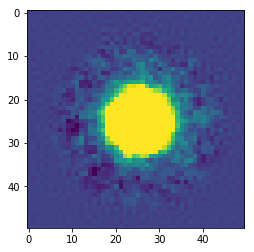

In [690]:
plt.imshow(interval(pd_cutout.real))

In [691]:
save_fits(pd_cutout.real, 'pd_cutout.fits')

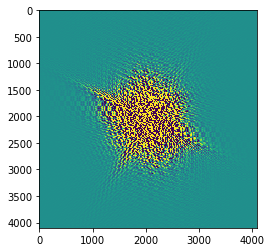

In [662]:
plt.imshow(interval(c1_coadd.real))

In [663]:
save_fits(c1_coadd.real, 'psf_c1_coadd.fits')

In [616]:
f_coadd = fft.fft2(coadd_exp.getImage().array)

In [618]:
c1_coadd = fft.ifft2(c1*f_coadd).real

hdu = fits.PrimaryHDU(c1_coadd)
hdul = fits.HDUList([hdu])
hdul.writeto('new2.fits')

In [619]:
def save_fits(data, save_path):
    hdu = fits.PrimaryHDU(data)
    hdul = fits.HDUList([hdu])
    hdul.writeto(save_path)

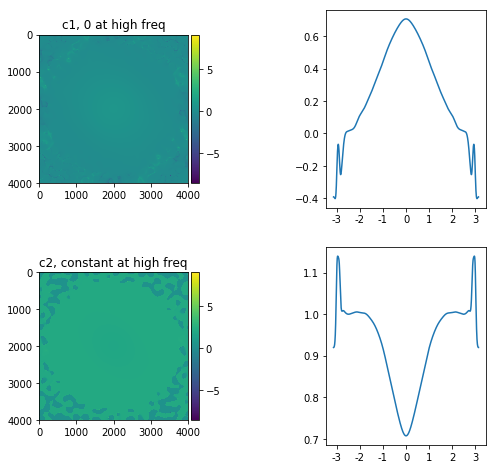

In [269]:
m = np.mean(c1.real)
std = np.std(c1.real)

c1_shift = fft.fftshift(c1)
c2_shift = fft.fftshift(c2)


fig, ax = plt.subplots(2, 2, figsize=(8, 8))
fig.subplots_adjust(wspace=0.8)
im0 = ax[0][0].imshow(c1_shift.real)
ax[0][0].set_title('c1, 0 at high freq')

ax[0][1].plot(w, c1_shift.real[2000])
ax[0][1].set_xticks([ -3, -2, -1, 0, 1, 2, 3])
ax[0][1].set_xticklabels([-3, -2, -1, 0, 1, 2, 3])

divider = make_axes_locatable(ax[0][0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im0, cax=cax, orientation='vertical')

im1 = ax[1][0].imshow(c2_shift.real)
ax[1][0].set_title('c2, constant at high freq')

divider = make_axes_locatable(ax[1][0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im0, cax=cax, orientation='vertical')

ax[1][1].plot(w, c2_shift.real[2000])
ax[1][1].set_xticks([ -3, -2, -1, 0, 1, 2, 3])
ax[1][1].set_xticklabels([-3, -2, -1, 0, 1, 2, 3])
print()

In [312]:
c1 = compute_c(f_coadd, f_calexp, 1, 1)
c2 = compute_c(f_calexp, f_coadd, 1, 1)
c1_shift = fft.fftshift(c1)
c2_shift = fft.fftshift(c2)

for x in range(4000):
    for y in range(4000):
        if np.sqrt((x-2000)**2 + (y-2000)**2) > 1500:
            c1_shift.real[x][y] = 1e-8
            c1_shift.imag[x][y] = 1e-8
        if np.sqrt((x-2000)**2 + (y-2000)**2) > 1300:
            c2_shift.real[x][y] = 1
            c2_shift.imag[x][y] = 1

In [313]:
4000 / np.pi

1273.2395447351628

In [314]:
calexp_exp.getImage().array.shape

(4000, 4072)

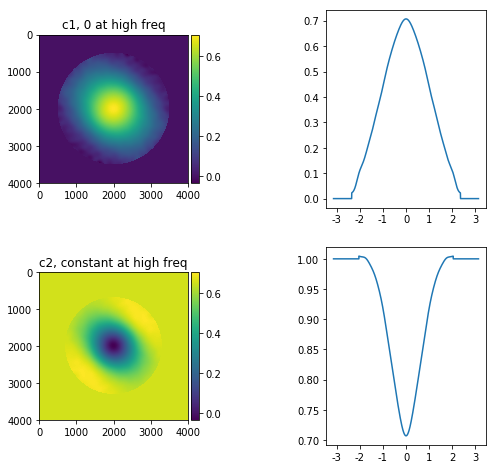

In [315]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
fig.subplots_adjust(wspace=0.8)
im0 = ax[0][0].imshow(c1_shift.real)
ax[0][0].set_title('c1, 0 at high freq')

ax[0][1].plot(w, c1_shift.real[2000])
ax[0][1].set_xticks([ -3, -2, -1, 0, 1, 2, 3])
ax[0][1].set_xticklabels([-3, -2, -1, 0, 1, 2, 3])

divider = make_axes_locatable(ax[0][0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im0, cax=cax, orientation='vertical')

im1 = ax[1][0].imshow(c2_shift.real)
ax[1][0].set_title('c2, constant at high freq')

divider = make_axes_locatable(ax[1][0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im0, cax=cax, orientation='vertical')

ax[1][1].plot(w, c2_shift.real[2000])
ax[1][1].set_xticks([ -3, -2, -1, 0, 1, 2, 3])
ax[1][1].set_xticklabels([-3, -2, -1, 0, 1, 2, 3])
print()

In [316]:
c1_xy = fft.ifft2(fft.fftshift(c1_shift))
c2_xy = fft.ifft2(fft.fftshift(c2_shift))

c1_xy = fft.fftshift(c1_xy)
c2_xy = fft.fftshift(c2_xy)



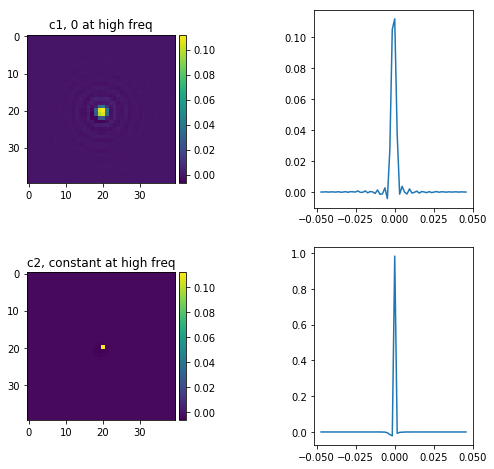

In [317]:

fig, ax = plt.subplots(2, 2, figsize=(8, 8))
fig.subplots_adjust(wspace=0.8)
im0 = ax[0][0].imshow(c1_xy.real[1980:2020, 1980:2020])
ax[0][0].set_title('c1, 0 at high freq')

ax[0][1].plot(w[1970:2030], c1_xy.real[2000][1970:2030])


divider = make_axes_locatable(ax[0][0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im0, cax=cax, orientation='vertical')

im1 = ax[1][0].imshow(c2_xy.real[1980:2020, 1980:2020])
ax[1][0].set_title('c2, constant at high freq')

divider = make_axes_locatable(ax[1][0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im0, cax=cax, orientation='vertical')

ax[1][1].plot(w[1970:2030], c2_xy.real[2000][1970:2030])
print()